# Read and plot spatial data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
import os

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [12]:
data = np.load(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\theilslopes_DTW.npz')
print(data.files)

['dtw_syr', 'dtw_condyr', 'dtw_s_nmax_yr', 'dtw_nmax_yr', 'dtw_vyr', 'dtw_tyr', 'dtw_resyr', 'HydroID', 'lat', 'lon', 'dtw_interc_t', 'dtw_slop_t']


In [ ]:
## convierto en matriz lo que tengo imshow | con x-y picolor mesh que es más rápido cuendo la matriz es pesada. Suavizarlo 
### o cosas asi...
## cartopy

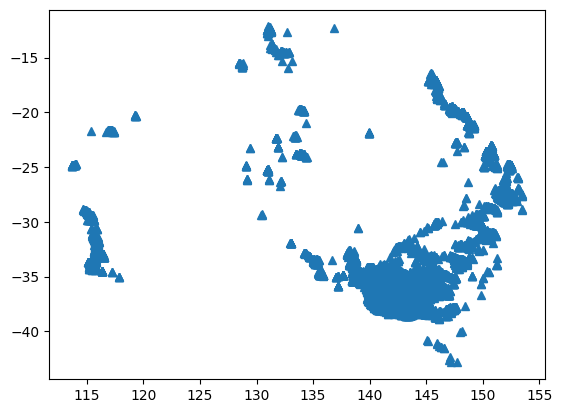

In [14]:
plt.plot(lon[ipass],lat[ipass],'^')
plt.show()

# Create grid and find # BH in grid

### 10 | 50 divisiones de grilla

TypeError: imshow() got multiple values for argument 'cmap'

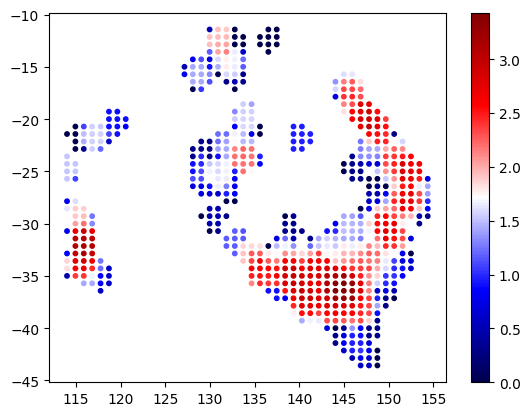

<Figure size 640x480 with 0 Axes>

In [20]:
glon = np.linspace(114,160,50)
glat = np.linspace(-45,-10,50)
X,Y  = np.meshgrid(glon,glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X) # número total de celdas en la cuadrícula

bcnt        = np.zeros(ngrid) # contador de puntos en cada celda
mn_slope    = np.zeros(ngrid)  # pendiente promedio de cada celda
mn_slope[:] = np.nan           #inicializar con NaN

# Calcular las estadisticas por celdas
for i in range(ngrid):
    
    bdist   = ((X[i]-lon[ipass])**2 + (Y[i]-lat[ipass])**2)
    iloc    = np.where(bdist<2)[0] # índices locales de los úntos cercanos
    jloc    = ipass[iloc] # índices locales de los datos originales
    bcnt[i] = len(jloc)
    if (len(jloc)<1):
        continue
    mn_slope[i] = np.median(tslope[jloc])  # calculo de la mediana

plt.scatter(X,Y,s=10,c=np.log10(bcnt), cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()

plt.figure()
plt.imshow(X,Y, cmap='viridis')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()
plt.show()

### 100 | 50 divisiones de grilla

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_12084\3052328881.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(X,Y,s=100,c=np.log10(bcnt), cmap='seismic')


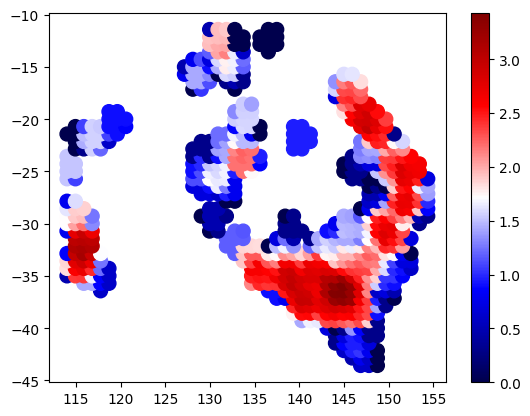

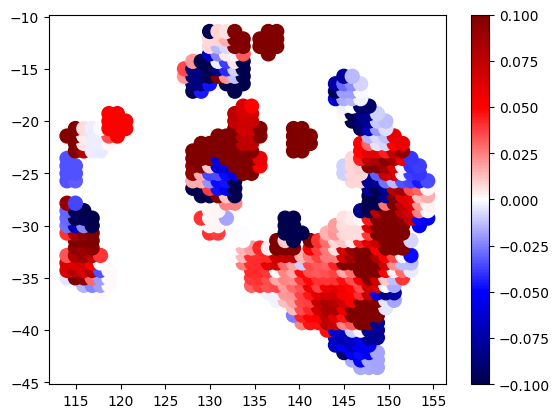

In [10]:
glon = np.linspace(114,160,50)
glat = np.linspace(-45,-10,50)
X,Y  = np.meshgrid(glon,glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X) # número total de celdas en la cuadrícula

bcnt        = np.zeros(ngrid) # contador de puntos en cada celda
mn_slope    = np.zeros(ngrid)  # pendiente promedio de cada celda
mn_slope[:] = np.nan           #inicializar con NaN

# Calcular las estadisticas por celdas
for i in range(ngrid):
    
    bdist   = ((X[i]-lon[ipass])**2 + (Y[i]-lat[ipass])**2)
    iloc    = np.where(bdist<2)[0] # índices locales de los úntos cercanos
    jloc    = ipass[iloc] # índices locales de los datos originales
    bcnt[i] = len(jloc)
    if (len(jloc)<1):
        continue
    mn_slope[i] = np.mean(tslope[jloc])  # calculo de la mediana

plt.scatter(X,Y,s=100,c=np.log10(bcnt), cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()

plt.figure()
plt.scatter(X,Y,s=100,c=mn_slope,vmin=-0.1,vmax=0.1, cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()
plt.show()

### 300 | 50 divisiones de grilla

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_12084\1032031284.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(X,Y,s=300,c=np.log10(bcnt), cmap='seismic')


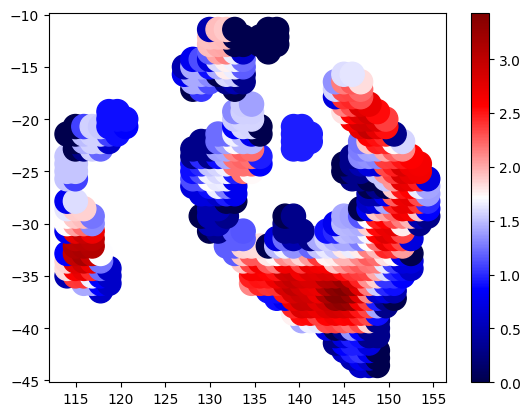

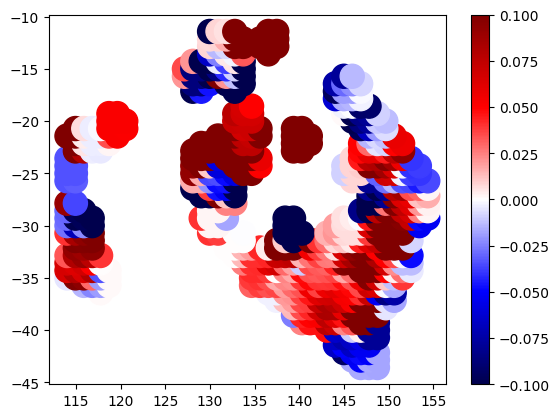

In [12]:
glon = np.linspace(114,160,50)
glat = np.linspace(-45,-10,50)
X,Y  = np.meshgrid(glon,glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X) # número total de celdas en la cuadrícula

bcnt        = np.zeros(ngrid) # contador de puntos en cada celda
mn_slope    = np.zeros(ngrid)  # pendiente promedio de cada celda
mn_slope[:] = np.nan           #inicializar con NaN

# Calcular las estadisticas por celdas
for i in range(ngrid):
    
    bdist   = ((X[i]-lon[ipass])**2 + (Y[i]-lat[ipass])**2)
    iloc    = np.where(bdist<2)[0] # índices locales de los úntos cercanos
    jloc    = ipass[iloc] # índices locales de los datos originales
    bcnt[i] = len(jloc)
    if (len(jloc)<1):
        continue
    mn_slope[i] = np.mean(tslope[jloc])  # calculo de la mediana

plt.scatter(X,Y,s=300,c=np.log10(bcnt), cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()

plt.figure()
plt.scatter(X,Y,s=300,c=mn_slope,vmin=-0.1,vmax=0.1, cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()
plt.show()

#### Grillas

#### 100 | 25 divisiones de grilla

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_12084\3713479574.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(X,Y,s=100,c=np.log10(bcnt), cmap='seismic')


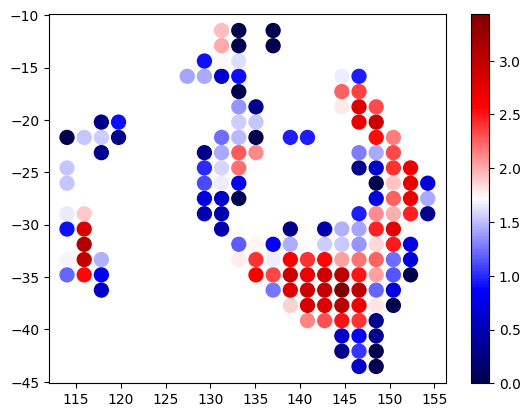

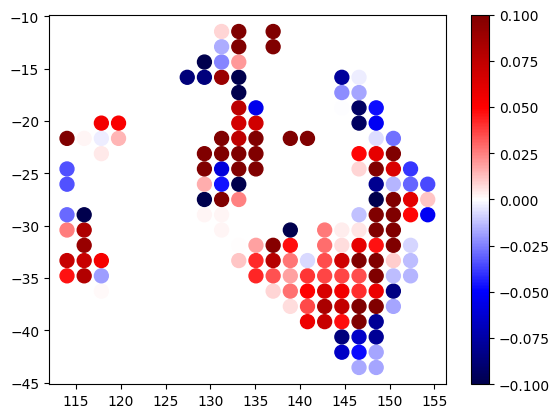

In [17]:
glon = np.linspace(114,160,25) 
glat = np.linspace(-45,-10,25)
X,Y  = np.meshgrid(glon,glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X) # número total de celdas en la cuadrícula

bcnt        = np.zeros(ngrid) # contador de puntos en cada celda
mn_slope    = np.zeros(ngrid)  # pendiente promedio de cada celda
mn_slope[:] = np.nan           #inicializar con NaN

# Calcular las estadisticas por celdas
for i in range(ngrid):
    
    bdist   = ((X[i]-lon[ipass])**2 + (Y[i]-lat[ipass])**2)
    iloc    = np.where(bdist<2)[0] # índices locales de los úntos cercanos
    jloc    = ipass[iloc] # índices locales de los datos originales
    bcnt[i] = len(jloc)
    if (len(jloc)<1):
        continue
    mn_slope[i] = np.mean(tslope[jloc])  # calculo de la mediana

plt.scatter(X,Y,s=100,c=np.log10(bcnt), cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()

plt.figure()
plt.scatter(X,Y,s=100,c=mn_slope,vmin=-0.1,vmax=0.1, cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()
plt.show()

#### 300 | 25 divisiones de grilla

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_18876\560945231.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(X,Y,s=300,c=np.log10(bcnt), cmap='seismic')


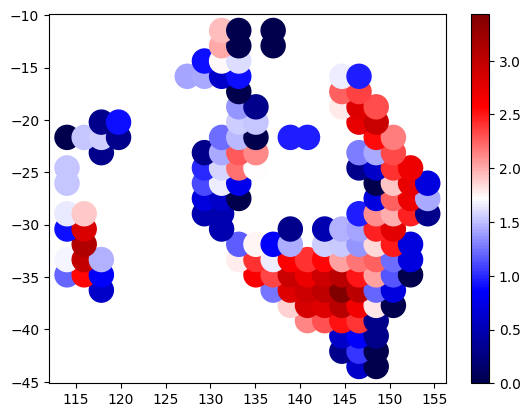

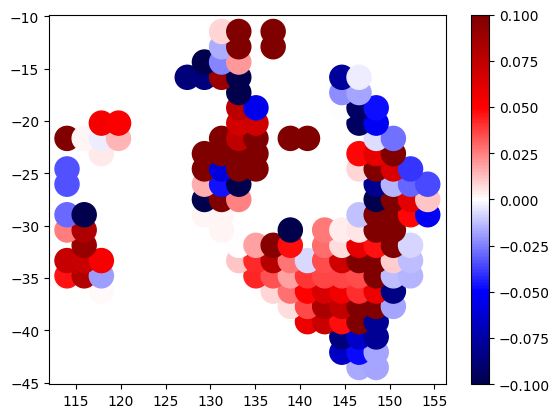

In [15]:
glon = np.linspace(114,160,25) 
glat = np.linspace(-45,-10,25)
X,Y  = np.meshgrid(glon,glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X) # número total de celdas en la cuadrícula

bcnt        = np.zeros(ngrid) # contador de puntos en cada celda
mn_slope    = np.zeros(ngrid)  # pendiente promedio de cada celda
mn_slope[:] = np.nan           #inicializar con NaN

# Calcular las estadisticas por celdas
for i in range(ngrid):
    
    bdist   = ((X[i]-lon[ipass])**2 + (Y[i]-lat[ipass])**2)
    iloc    = np.where(bdist<2)[0] # índices locales de los úntos cercanos
    jloc    = ipass[iloc] # índices locales de los datos originales
    bcnt[i] = len(jloc)
    if (len(jloc)<1):
        continue
    mn_slope[i] = np.mean(tslope[jloc])  # calculo de la mediana

plt.scatter(X,Y,s=300,c=np.log10(bcnt), cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()

plt.figure()
plt.scatter(X,Y,s=300,c=mn_slope,vmin=-0.1,vmax=0.1, cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()
plt.savefig('mapa_densidad.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_18876\3179754970.py:5: RuntimeWarning: divide by zero encountered in log10
  sc1 = ax1.scatter(X, Y, s=300, c=np.log10(bcnt), cmap='seismic')


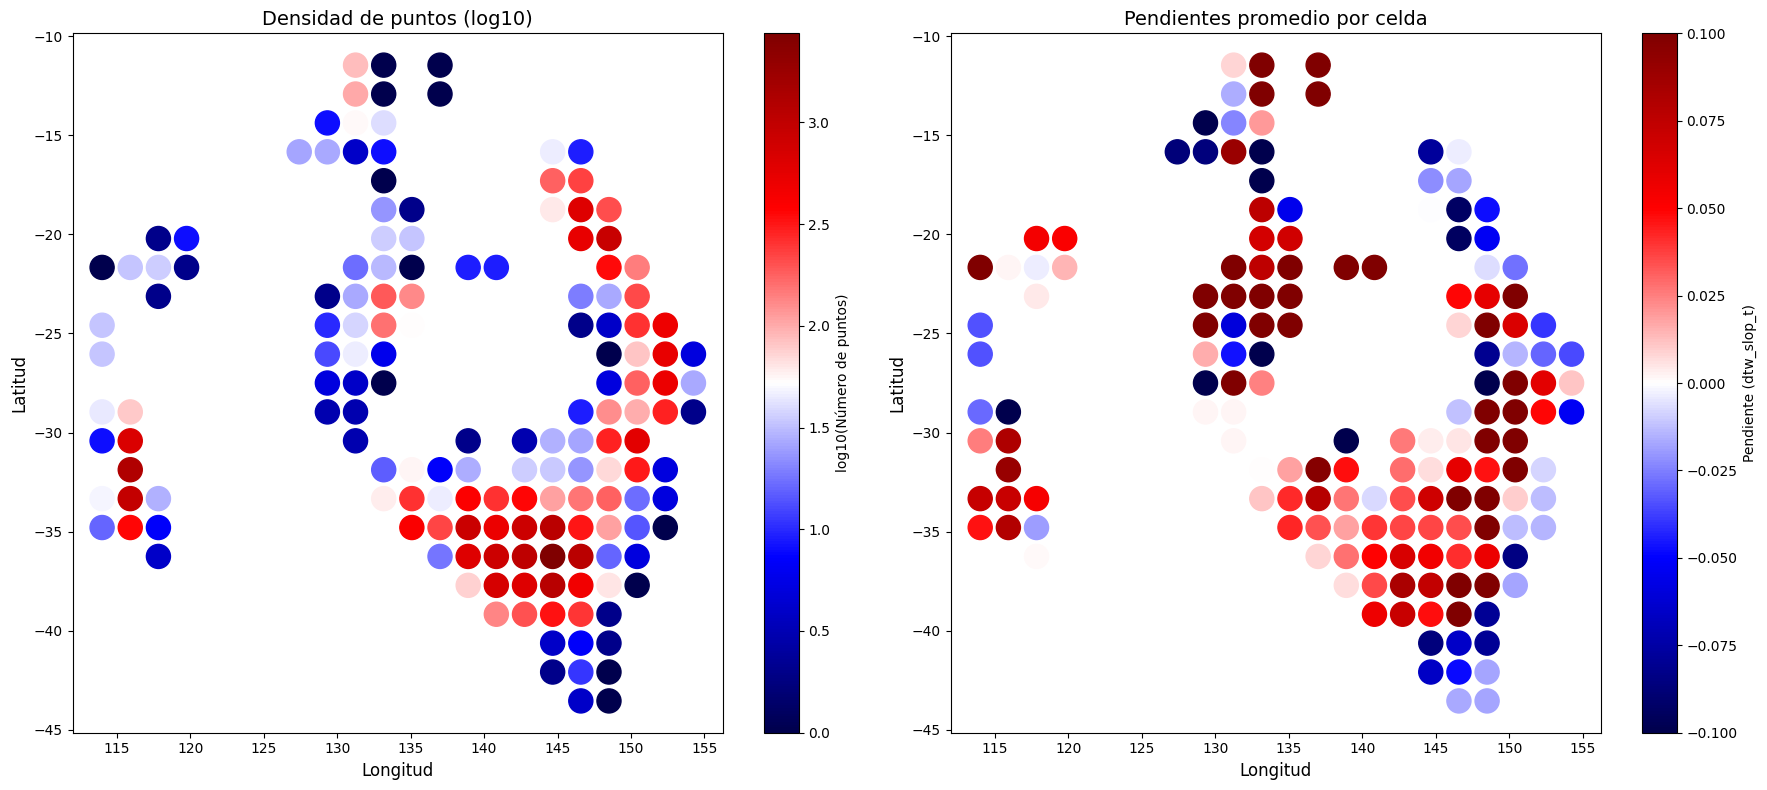

In [17]:
# Crear una figura con 2 subplots (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # 18x8 pulgadas para mejor visualización

# --- Primer subplot: Densidad de puntos (log10) ---
sc1 = ax1.scatter(X, Y, s=300, c=np.log10(bcnt), cmap='seismic')
ax1.set_title('Densidad de puntos (log10)', fontsize=14)
ax1.set_xlabel('Longitud', fontsize=12)
ax1.set_ylabel('Latitud', fontsize=12)
fig.colorbar(sc1, ax=ax1, label='log10(Número de puntos)')

# --- Segundo subplot: Pendientes promedio ---
sc2 = ax2.scatter(X, Y, s=300, c=mn_slope, cmap='seismic', vmin=-0.1, vmax=0.1)
ax2.set_title('Pendientes promedio por celda', fontsize=14)
ax2.set_xlabel('Longitud', fontsize=12)
ax2.set_ylabel('Latitud', fontsize=12)
fig.colorbar(sc2, ax=ax2, label='Pendiente (dtw_slop_t)')

# Ajustar diseño y guardar
plt.tight_layout()  # Evita solapamiento
plt.savefig('mapa_combinado_densidad_pendientes.png', dpi=300, bbox_inches='tight')
plt.show()

#### 10 | 100 divisiones de grilla

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_18876\4018840752.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(X,Y,s=10,c=np.log10(bcnt), cmap='seismic')


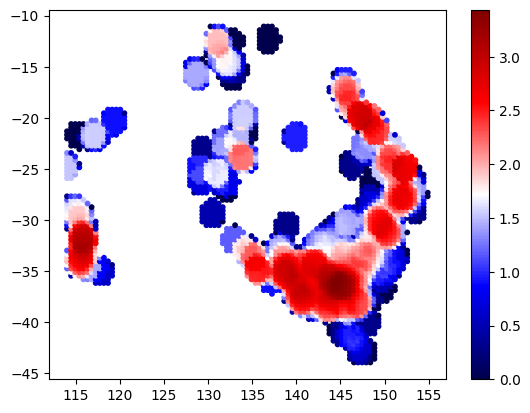

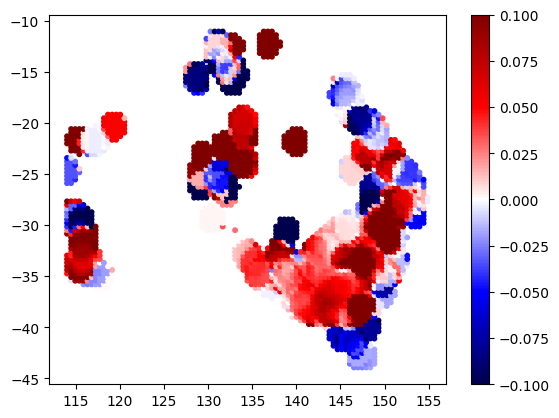

In [14]:
glon = np.linspace(114,160,100) 
glat = np.linspace(-45,-10,100)
X,Y  = np.meshgrid(glon,glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X) # número total de celdas en la cuadrícula

bcnt        = np.zeros(ngrid) # contador de puntos en cada celda
mn_slope    = np.zeros(ngrid)  # pendiente promedio de cada celda
mn_slope[:] = np.nan           #inicializar con NaN

# Calcular las estadisticas por celdas
for i in range(ngrid):
    
    bdist   = ((X[i]-lon[ipass])**2 + (Y[i]-lat[ipass])**2)
    iloc    = np.where(bdist<2)[0] # índices locales de los úntos cercanos
    jloc    = ipass[iloc] # índices locales de los datos originales
    bcnt[i] = len(jloc)
    if (len(jloc)<1):
        continue
    mn_slope[i] = np.mean(tslope[jloc])  # calculo de la mediana

plt.scatter(X,Y,s=10,c=np.log10(bcnt), cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()

plt.figure()
plt.scatter(X,Y,s=10,c=mn_slope,vmin=-0.1,vmax=0.1, cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()
plt.show()

In [ ]:
#### 

#### Desviación estándar

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_12084\1593851790.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(X,Y,s=300,c=np.log10(bcnt), cmap='seismic')


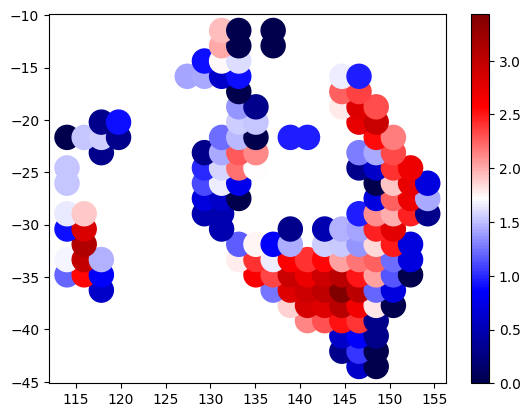

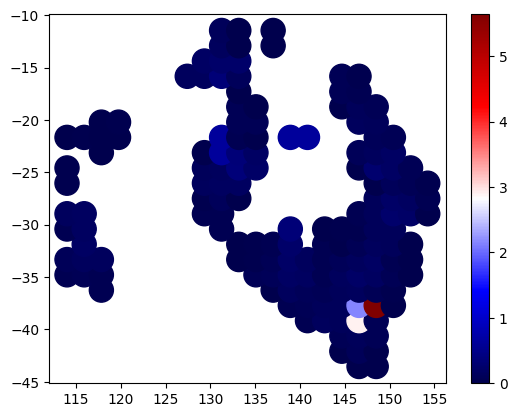

In [24]:
glon = np.linspace(114,160,25) 
glat = np.linspace(-45,-10,25)
X,Y  = np.meshgrid(glon,glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X) # número total de celdas en la cuadrícula

bcnt        = np.zeros(ngrid) # contador de puntos en cada celda
mn_slope    = np.zeros(ngrid)  # pendiente promedio de cada celda
mn_slope[:] = np.nan           #inicializar con NaN

# Calcular las estadisticas por celdas
for i in range(ngrid):
    
    bdist   = ((X[i]-lon[ipass])**2 + (Y[i]-lat[ipass])**2)
    iloc    = np.where(bdist<2)[0] # índices locales de los úntos cercanos
    jloc    = ipass[iloc] # índices locales de los datos originales
    bcnt[i] = len(jloc)
    if (len(jloc)<1):
        continue
    mn_slope[i] = np.std(tslope[jloc])  # calculo de la mediana

plt.scatter(X,Y,s=300,c=np.log10(bcnt), cmap='seismic')
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()

plt.figure()
plt.scatter(X,Y,s=300,c=mn_slope, cmap='seismic') #vmin=-0.1,vmax=0.1,
#plt.plot(lon[ipass],lat[ipass],'^')
#plt.plot(X,Y,'ro')
plt.colorbar()
plt.show()

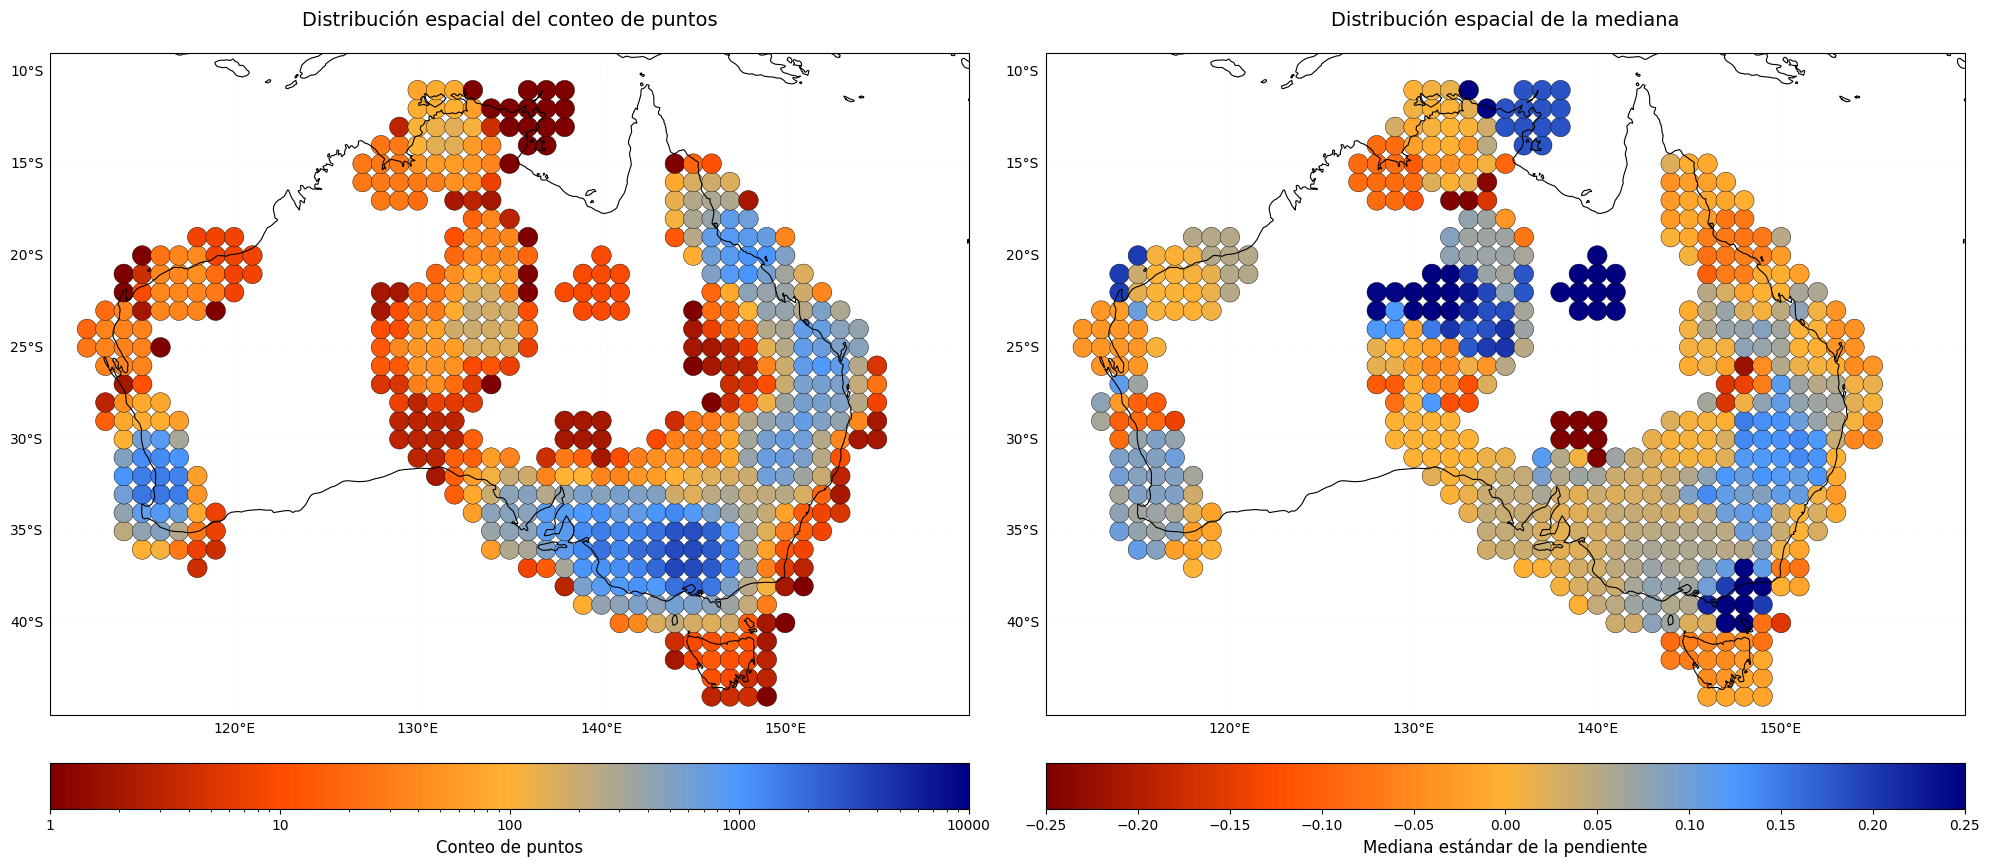

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.colors as mcolors

# Ruta base shapefiles descargados
base_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\cartopy'

# Solo necesitamos el shapefile de la costa ahora
coast_shp = Reader(f'{base_path}\\ne_50m_coastline\\ne_50m_coastline.shp')
coast_feature = ShapelyFeature(coast_shp.geometries(), ccrs.PlateCarree(), 
                             edgecolor='black', facecolor='none', linewidth=0.8)

# Cargar datos reales
data = np.load(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\theilslopes_DTW.npz')
lat = data['lat']
lon = data['lon']
icond = data['dtw_condyr']
tslope = data['dtw_slop_t']
ipass = np.where(icond == 1)[0]

# Calcular límites del mapa basados en los datos reales
lon_min, lon_max = np.min(lon[ipass])-2, np.max(lon[ipass])+2
lat_min, lat_max = np.min(lat[ipass])-2, np.max(lat[ipass])+2

# Asegurar que los límites estén dentro de rangos razonables
lon_min = max(110, lon_min)  # No menos de 110°E
lon_max = min(160, lon_max)  # No más de 160°E
lat_min = max(-45, lat_min)  # No menos de -45°S
lat_max = min(-9, lat_max)   # No más de -9°S

# ---------CAMBIO VALORES DE LAS GRILLAS-------
glon = np.arange(np.floor(lon_min/1)*1, np.ceil(lon_max/1)*1+1, 1)
glat = np.arange(np.floor(lat_min/1)*1, np.ceil(lat_max/1)*1+1, 1)
X, Y = np.meshgrid(glon, glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X)

# Procesamiento de datos
bcnt = np.zeros(ngrid)
mn_slope = np.full(ngrid, np.nan)

for i in range(ngrid):
    bdist = ((X[i] - lon[ipass])**2 + (Y[i] - lat[ipass])**2)
    iloc = np.where(bdist < 4)[0]
    jloc = ipass[iloc]
    bcnt[i] = len(jloc)
    if len(jloc) >= 1:
        mn_slope[i] = np.mean(tslope[jloc])

# Filtrar solo puntos con datos
valid_points_count = ~np.isnan(bcnt) & (bcnt > 0)
valid_points_slope = ~np.isnan(mn_slope)

# Colormap personalizado
colors = [
    (0.5, 0, 0),
    (1, 0.3, 0),
    (1, 0.7, 0.2),
    (0.3, 0.6, 1),
    (0, 0, 0.5)
]
cmap = LinearSegmentedColormap.from_list('custom_div', colors)

# Crear figura con dimensiones ajustadas
fig = plt.figure(figsize=(20, 10))
proj = ccrs.PlateCarree()

# Ajustar los márgenes para mejor distribución
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9, wspace=0.2)

# Plot 1: Conteo
ax1 = fig.add_subplot(121, projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_facecolor('white')  # Fondo blanco

# Solo agregar la línea de costa (sin rellenos)
ax1.add_feature(coast_feature, zorder=10)

# Scatter plot solo con puntos válidos (escala logaritmica)
max_bcnt = np.nanmax(bcnt)
vmax = 10 ** np.ceil(np.log10(max_bcnt))
sc1 = ax1.scatter(
    X[valid_points_count], Y[valid_points_count],
    s=200,
    c=bcnt[valid_points_count],
    cmap=cmap,
    norm=mcolors.LogNorm(vmin=1, vmax=vmax),
    transform=proj,
    edgecolor='k',
    linewidth=0.3,
    zorder=5  # Debajo de la línea de costa
)

# Configurar grilla muy tenue
gl1 = ax1.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.2, linestyle=':')
gl1.top_labels = False
gl1.right_labels = False

# Barra de colores
cbar1 = plt.colorbar(
    sc1,
    ax=ax1,
    orientation='horizontal',
    pad=0.05,
    ticks=[10**i for i in range(0, int(np.log10(vmax)) + 1)]
)
cbar1.set_label('Conteo de puntos', fontsize=12)
ticks = [10**i for i in range(0, int(np.log10(vmax)) + 1)]
labels = [str(int(tick)) for tick in ticks]
cbar1.set_ticks(ticks)
cbar1.ax.set_xticklabels(labels)
ax1.set_title('Distribución espacial del conteo de puntos', pad=20, fontsize=14)

# Plot 2: Pendiente media
ax2 = fig.add_subplot(122, projection=proj)
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax2.set_facecolor('white')  # Fondo blanco

# Solo agregar la línea de costa (sin rellenos)
ax2.add_feature(coast_feature, zorder=10)

# Scatter plot solo con puntos válidos
sc2 = ax2.scatter(
    X[valid_points_slope], Y[valid_points_slope], 
    s=200, 
    c=mn_slope[valid_points_slope],
    cmap=cmap,
    vmin=-0.25,
    vmax=0.25,
    transform=proj, 
    edgecolor='k', 
    linewidth=0.3, 
    zorder=5  # Debajo de la línea de costa
)

# Configurar grilla muy tenue
gl2 = ax2.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.2, linestyle=':')
gl2.top_labels = False
gl2.right_labels = False

# Barra de color
cbar2 = plt.colorbar(
    sc2, 
    ax=ax2, 
    orientation='horizontal', 
    pad=0.05,
    ticks=np.linspace(-0.25, 0.25, 11)
)
cbar2.set_label('Mediana estándar de la pendiente', fontsize=12)
ax2.set_title('Distribución espacial de la mediana', pad=20, fontsize=14)

# Guardar y mostrar
plt.tight_layout()
plt.savefig(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\mapas\mapa_meanG1x_solo_costa.png', 
           dpi=300, bbox_inches='tight')
plt.show()

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_12264\411311779.py:99: RuntimeWarning: divide by zero encountered in log10
  bcnt_log = np.where(bcnt > 0, np.log10(bcnt), np.nan)


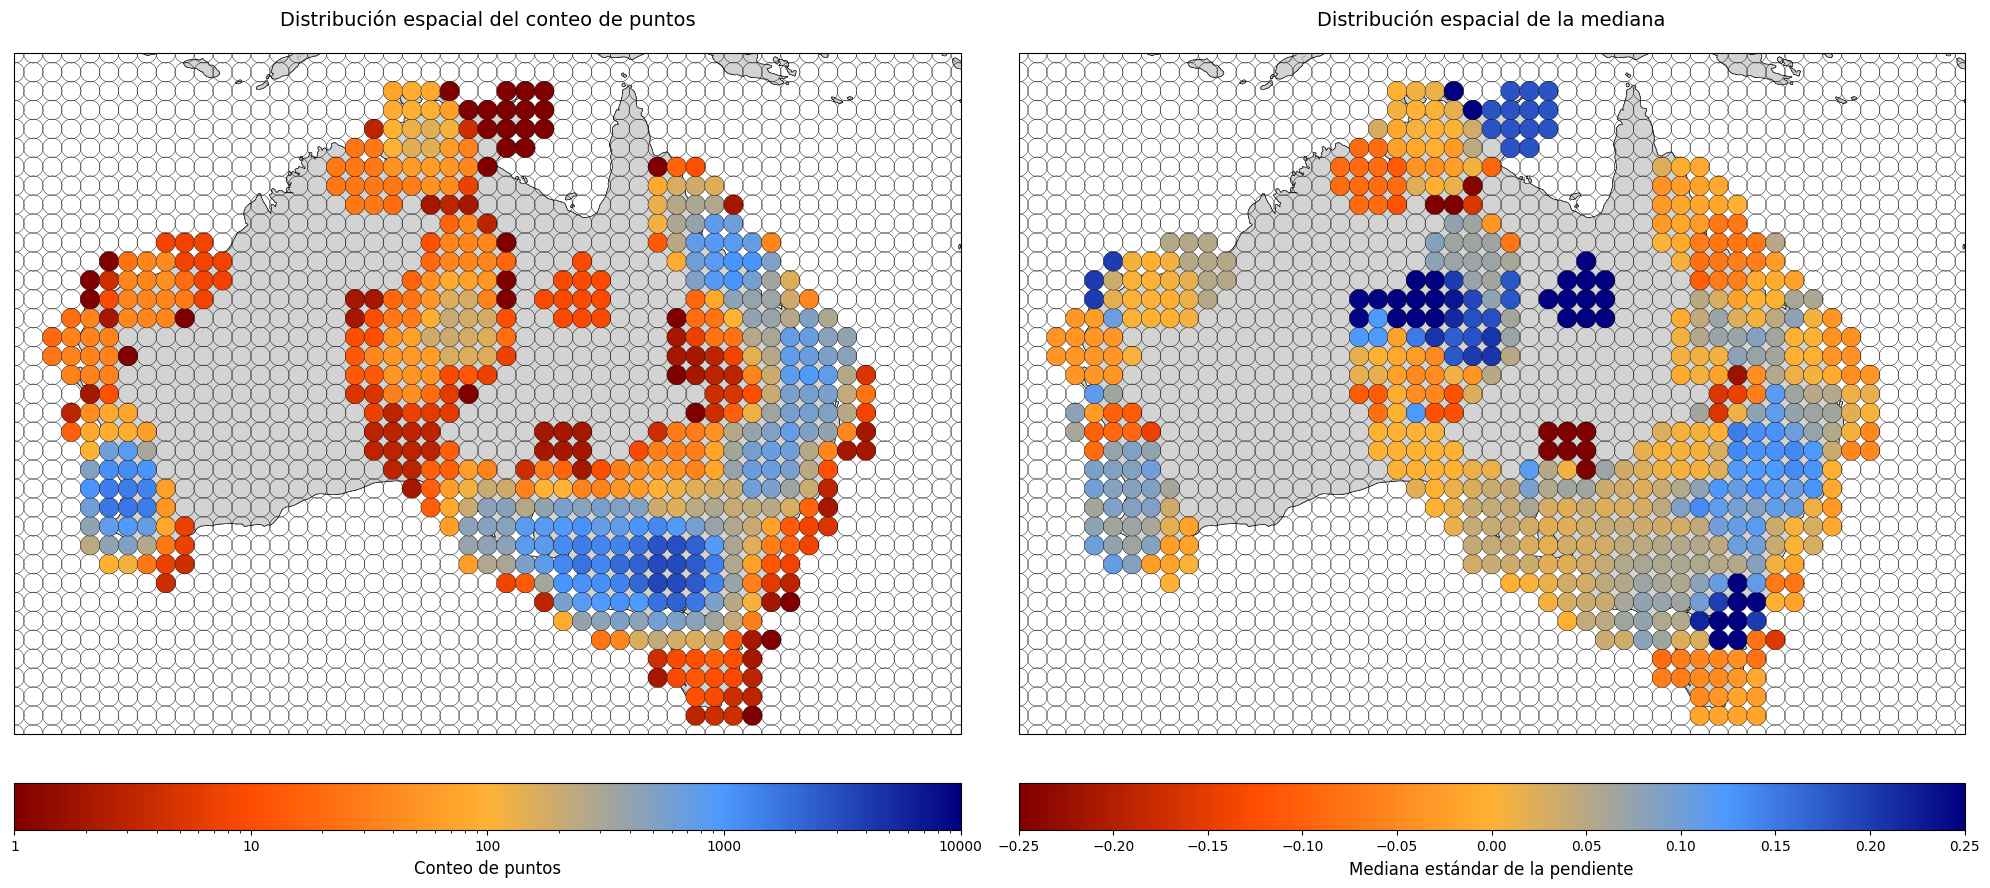

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.colors as mcolors

# Ruta base shapefiles descargados
base_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\cartopy'

# Crear features a partir de los shapefiles descargados
land_shp = Reader(f'{base_path}\\ne_50m_land\\ne_50m_land.shp')
land_feature = ShapelyFeature(land_shp.geometries(), ccrs.PlateCarree(), facecolor='none')

coast_shp = Reader(f'{base_path}\\ne_50m_coastline\\ne_50m_coastline.shp')
coast_feature = ShapelyFeature(coast_shp.geometries(), ccrs.PlateCarree(), edgecolor='black', linewidth=0.8)

border_shp = Reader(f'{base_path}\\ne_50m_admin_0_countries\\ne_50m_admin_0_countries.shp')
border_feature = border_feature = ShapelyFeature(border_shp.geometries(), ccrs.PlateCarree(), 
                              facecolor='lightgray',          # Relleno gris para países
                              edgecolor='gray',          # Borde gris
                              linestyle=':', 
                              linewidth=0.5)


# Cargar datos reales
data = np.load(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\theilslopes_DTW.npz')
lat = data['lat']
lon = data['lon']
icond = data['dtw_condyr']
tslope = data['dtw_slop_t']
ipass = np.where(icond == 1)[0]

# Calcular límites del mapa basados en los datos realese
lon_min, lon_max = np.min(lon[ipass])-2, np.max(lon[ipass])+2
lat_min, lat_max = np.min(lat[ipass])-2, np.max(lat[ipass])+2

# Asegurar que los límites estén dentro de rangos razonables
lon_min = max(110, lon_min)  # No menos de 110°E
lon_max = min(160, lon_max)  # No más de 160°E
lat_min = max(-45, lat_min)  # No menos de -45°S
lat_max = min(-9, lat_max)   # No más de -9°S

# ---------CAMBIO VALORES DE LAS GRILLAS-------
glon = np.arange(np.floor(lon_min/1)*1, np.ceil(lon_max/1)*1+1, 1)
glat = np.arange(np.floor(lat_min/1)*1, np.ceil(lat_max/1)*1+1, 1)
X, Y = np.meshgrid(glon, glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X)

# Procesamiento de datos
bcnt = np.zeros(ngrid)
mn_slope = np.full(ngrid, np.nan)

for i in range(ngrid):
    bdist = ((X[i] - lon[ipass])**2 + (Y[i] - lat[ipass])**2)
    iloc = np.where(bdist < 4)[0]
    jloc = ipass[iloc]
    bcnt[i] = len(jloc)
    if len(jloc) >= 1:
        mn_slope[i] = np.mean(tslope[jloc])

# Colormap personalizado
colors = [
    (0.5, 0, 0),
    (1, 0.3, 0),
    (1, 0.7, 0.2),
    (0.3, 0.6, 1),
    (0, 0, 0.5)
]
cmap = LinearSegmentedColormap.from_list('custom_div', colors)

# Crear figura con dimensiones ajustadas
fig = plt.figure(figsize=(20, 10))
proj = ccrs.PlateCarree()

# Ajustar los márgenes para mejor distribución
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9, wspace=0.2)

# Plot 1: Conteo
ax1 = fig.add_subplot(121, projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_facecolor('white')

# Agregar características del mapa
ax1.add_feature(land_feature)
ax1.add_feature(coast_feature)
ax1.add_feature(border_feature)

# Configurar grilla
#gl = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Scatter plot con puntos (escala logaritmica)

bcnt_log = np.where(bcnt > 0, np.log10(bcnt), np.nan)
max_bcnt = np.nanmax(bcnt)
vmax = 10 ** np.ceil(np.log10(max_bcnt))
sc1 = ax1.scatter(
    X, Y,
    s=200,
    c=bcnt,
    cmap=cmap,
    norm=mcolors.LogNorm(vmin=1, vmax=vmax),
    transform=proj,
    edgecolor='k',
    linewidth=0.3,
    zorder=10
)

# Barra de colores
cbar1 = plt.colorbar(
    sc1,
    ax=ax1,
    orientation='horizontal',
    pad=0.05,
    ticks=[10**i for i in range(0, int(np.log10(vmax)) + 1)]
)
cbar1.set_label('Conteo de puntos', fontsize=12)
ticks = [10**i for i in range(0, int(np.log10(vmax)) + 1)]  # Ej: [1, 10, 100, 1000, 10000]
labels = [str(int(tick)) for tick in ticks]  # Convierte a enteros y luego a texto

cbar1.set_ticks(ticks)  # Posiciones de los ticks
cbar1.ax.set_xticklabels(labels)  # Etiquetas personalizadas
ax1.set_title('Distribución espacial del conteo de puntos', pad=20, fontsize=14)

# Plot 2: Desviación estándar
ax2 = fig.add_subplot(122, projection=proj)
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

# Agregar características del mapa
ax2.add_feature(land_feature)
ax2.add_feature(coast_feature)
ax2.add_feature(border_feature)

# Configurar grilla
#gl = ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Scatter plot desviación | mediana
sc2 = ax2.scatter(
    X, Y, 
    s=200, 
    c=mn_slope,
    cmap=cmap,
    vmin=-0.25,
    vmax=0.25,
    transform=proj, 
    edgecolor='k', 
    linewidth=0.3, 
    zorder=10
)

# Barra de color CORREGIDA (pad cambiado a 0.05)
cbar2 = plt.colorbar(
    sc2, 
    ax=ax2, 
    orientation='horizontal', 
    pad=0.05,  # Valor corregido aquí
    ticks=np.linspace(-0.25, 0.25, 11)
)
cbar2.set_label('Mediana estándar de la pendiente', fontsize=12)
ax2.set_title('Distribución espacial de la mediana', pad=20, fontsize=14)

# Guardar y mostrar
plt.tight_layout()
plt.savefig(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\mapas\mapa_meanG1x.png', 
           dpi=300, bbox_inches='tight')
plt.show()

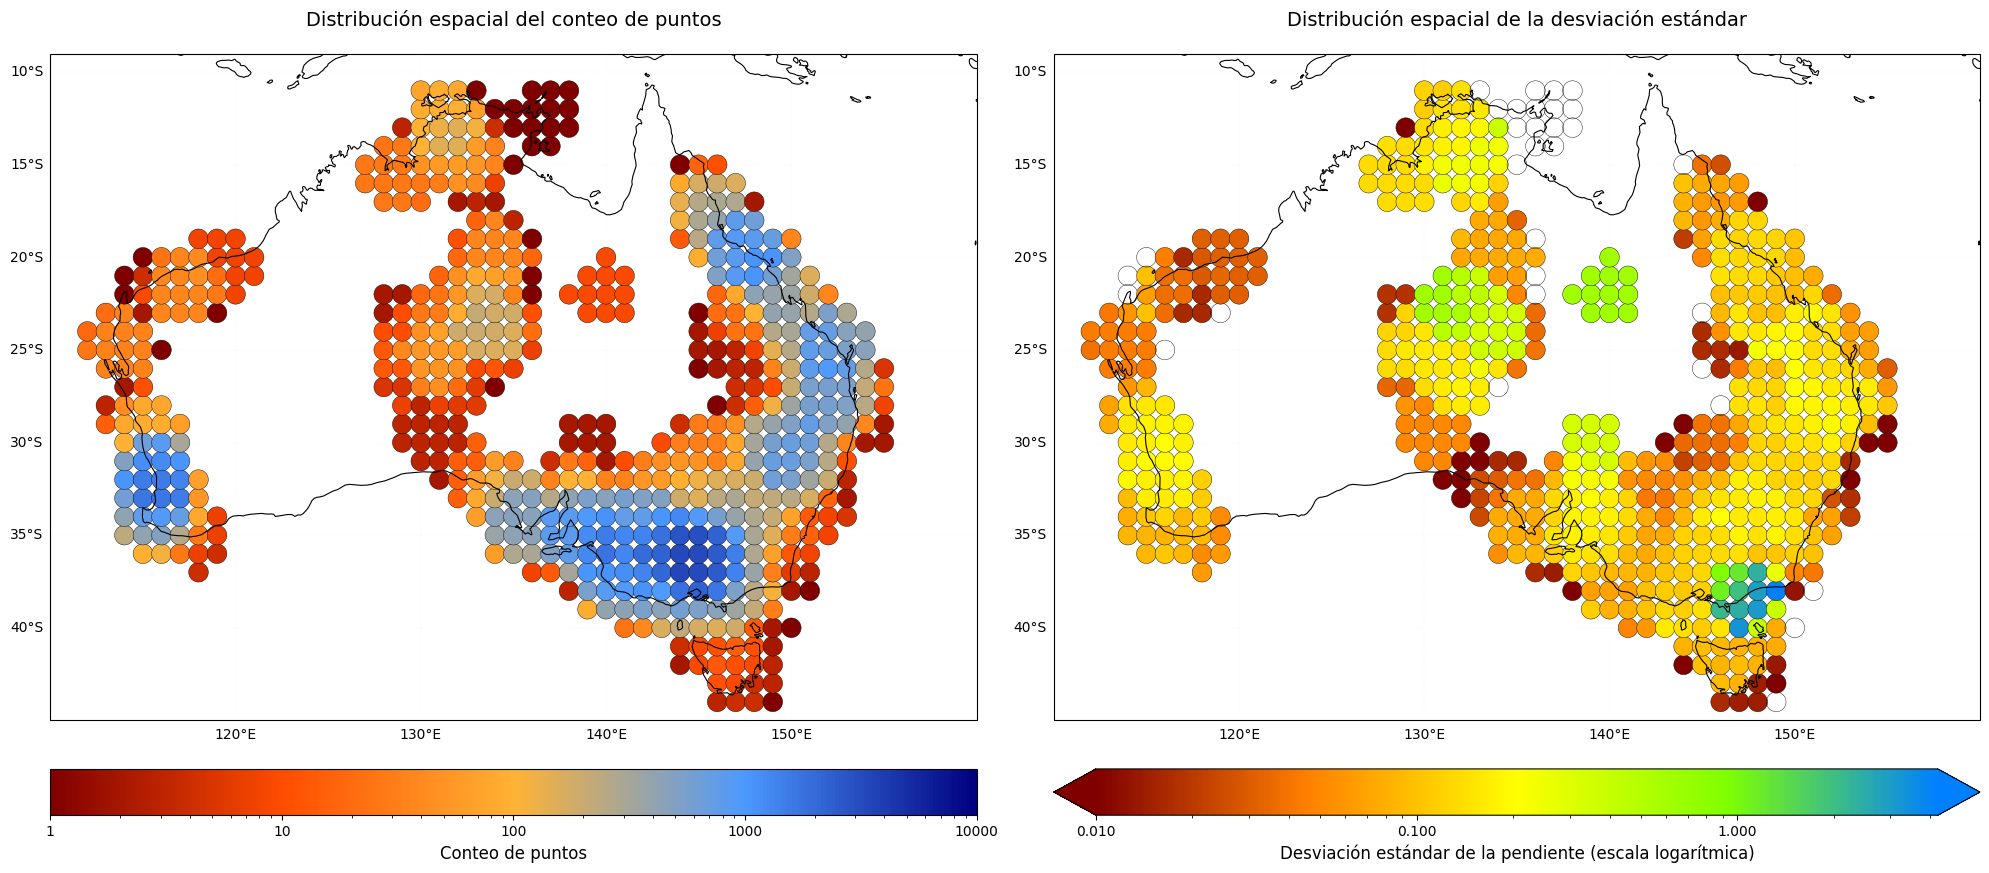

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.colors as mcolors

# Ruta base shapefiles descargados
base_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\cartopy'

# Solo necesitamos el shapefile de la costa
coast_shp = Reader(f'{base_path}\\ne_50m_coastline\\ne_50m_coastline.shp')
coast_feature = ShapelyFeature(coast_shp.geometries(), ccrs.PlateCarree(), 
                             edgecolor='black', facecolor='none', linewidth=0.8)

# Cargar datos reales
data = np.load(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\theilslopes_DTW.npz')
lat = data['lat']
lon = data['lon']
icond = data['dtw_condyr']
tslope = data['dtw_slop_t']
ipass = np.where(icond == 1)[0]

# Calcular límites del mapa basados en los datos reales
lon_min, lon_max = np.min(lon[ipass])-2, np.max(lon[ipass])+2
lat_min, lat_max = np.min(lat[ipass])-2, np.max(lat[ipass])+2

# Asegurar que los límites estén dentro de rangos razonables
lon_min = max(110, lon_min)  # No menos de 110°E
lon_max = min(160, lon_max)  # No más de 160°E
lat_min = max(-45, lat_min)  # No menos de -45°S
lat_max = min(-9, lat_max)   # No más de -9°S

# Configurar grilla
glon = np.arange(np.floor(lon_min/1)*1, np.ceil(lon_max/1)*1+1, 1)
glat = np.arange(np.floor(lat_min/1)*1, np.ceil(lat_max/1)*1+1, 1)
X, Y = np.meshgrid(glon, glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X)

# Procesamiento de datos - CALCULAR DESVIACIÓN ESTÁNDAR
bcnt = np.zeros(ngrid)
std_slope = np.full(ngrid, np.nan)

for i in range(ngrid):
    bdist = ((X[i] - lon[ipass])**2 + (Y[i] - lat[ipass])**2)
    iloc = np.where(bdist < 4)[0]
    jloc = ipass[iloc]
    bcnt[i] = len(jloc)
    if len(jloc) >= 1:
        std_slope[i] = np.std(tslope[jloc])

# Filtrar solo puntos con datos
valid_points_count = ~np.isnan(bcnt) & (bcnt > 0)
valid_points_std = ~np.isnan(std_slope)

# Colormap personalizado para desviación estándar
colors_std = [
    (0.5, 0, 0),   # Rojo oscuro para valores bajos
    (1.0, 0.5, 0), # Naranja
    (1.0, 1.0, 0), # Amarillo
    (0.5, 1.0, 0), # Verde claro
    (0.0, 0.5, 1.0) # Azul para valores altos
]
cmap_std = LinearSegmentedColormap.from_list('custom_std_log', colors_std)

# Colormap para conteo
colors_count = [
    (0.5, 0, 0),
    (1, 0.3, 0),
    (1, 0.7, 0.2),
    (0.3, 0.6, 1),
    (0, 0, 0.5)
]
cmap_count = LinearSegmentedColormap.from_list('custom_div', colors_count)

# Crear figura con dimensiones ajustadas
fig = plt.figure(figsize=(20, 10))
proj = ccrs.PlateCarree()

# Ajustar los márgenes para mejor distribución
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9, wspace=0.2)

# Plot 1: Conteo
ax1 = fig.add_subplot(121, projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_facecolor('white')

# Solo agregar la línea de costa
ax1.add_feature(coast_feature, zorder=10)

# Scatter plot solo con puntos válidos (escala logaritmica)
max_bcnt = np.nanmax(bcnt)
vmax = 10 ** np.ceil(np.log10(max_bcnt))
sc1 = ax1.scatter(
    X[valid_points_count], Y[valid_points_count],
    s=200,
    c=bcnt[valid_points_count],
    cmap=cmap_count,
    norm=mcolors.LogNorm(vmin=1, vmax=vmax),
    transform=proj,
    edgecolor='k',
    linewidth=0.3,
    zorder=5
)

# Configurar grilla muy tenue
gl1 = ax1.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.2, linestyle=':')
gl1.top_labels = False
gl1.right_labels = False

# Barra de colores para conteo
cbar1 = plt.colorbar(
    sc1,
    ax=ax1,
    orientation='horizontal',
    pad=0.05,
    ticks=[10**i for i in range(0, int(np.log10(vmax)) + 1)]
)
cbar1.set_label('Conteo de puntos', fontsize=12)
ticks = [10**i for i in range(0, int(np.log10(vmax)) + 1)]
labels = [str(int(tick)) for tick in ticks]
cbar1.set_ticks(ticks)
cbar1.ax.set_xticklabels(labels)
ax1.set_title('Distribución espacial del conteo de puntos', pad=20, fontsize=14)

# Plot 2: Desviación Estándar con escala logarítmica
ax2 = fig.add_subplot(122, projection=proj)
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax2.set_facecolor('white')

# Solo agregar la línea de costa
ax2.add_feature(coast_feature, zorder=10)

# Calcular máximo de desviación estándar
max_std = np.nanmax(std_slope[valid_points_std])

# Scatter plot desviación estándar con escala LOGARÍTMICA
# Usamos un pequeño offset (0.01) para evitar problemas con valores cero
sc2 = ax2.scatter(
    X[valid_points_std], Y[valid_points_std], 
    s=200, 
    c=std_slope[valid_points_std],
    cmap=cmap_std,
    norm=LogNorm(vmin=0.01, vmax=max_std),  # Escala logarítmica
    transform=proj, 
    edgecolor='k', 
    linewidth=0.3, 
    zorder=5
)

# Configurar grilla muy tenue
gl2 = ax2.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.2, linestyle=':')
gl2.top_labels = False
gl2.right_labels = False

# Barra de color para desviación estándar (escala logarítmica)
cbar2 = plt.colorbar(
    sc2, 
    ax=ax2, 
    orientation='horizontal', 
    pad=0.05,
    extend='both',  # Para mostrar que hay valores fuera del rango
    format='%.3f'   # Formato con 3 decimales
)
cbar2.set_label('Desviación estándar de la pendiente (escala logarítmica)', fontsize=12)
ax2.set_title('Distribución espacial de la desviación estándar', pad=20, fontsize=14)

# Guardar y mostrar
plt.tight_layout()
plt.savefig(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\mapas\mapa_des1_stdG1_logscale.png', 
           dpi=300, bbox_inches='tight')
plt.show()

Valor máximo de desviación estándar: 4.222334655238158


C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_12264\3689938307.py:99: RuntimeWarning: divide by zero encountered in log10
  bcnt_log = np.where(bcnt > 0, np.log10(bcnt), np.nan)


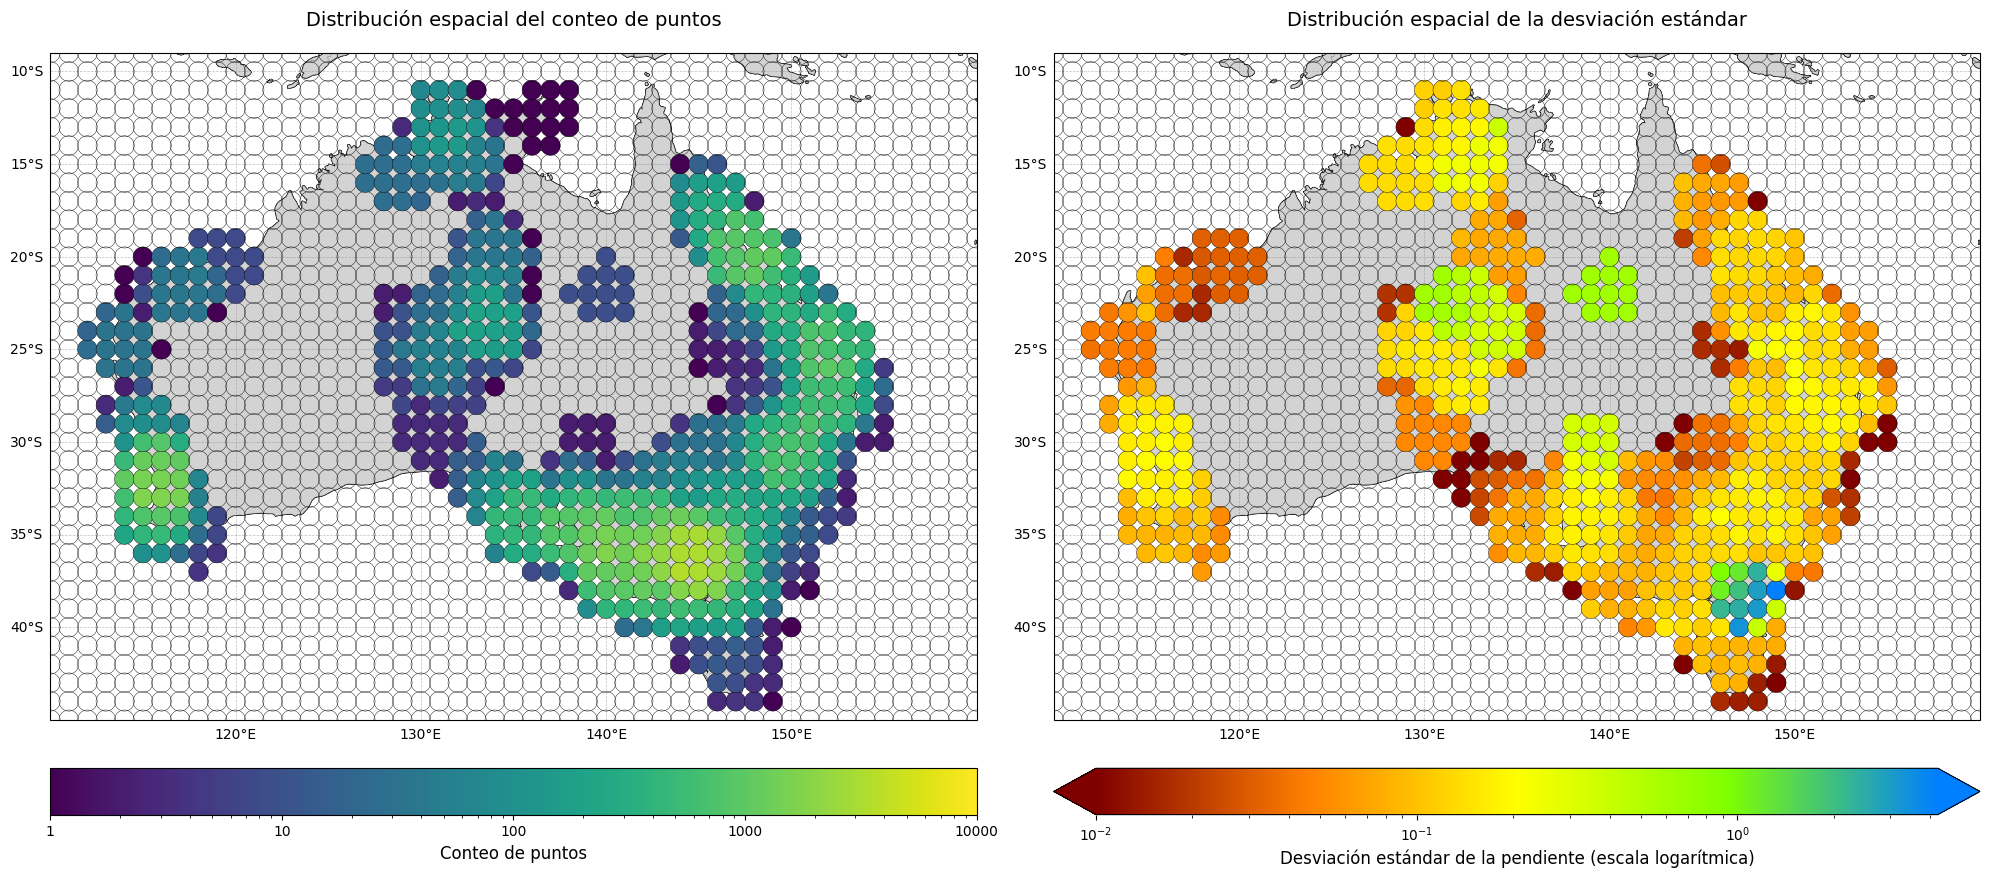

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.colors as mcolors

# Ruta base shapefiles descargados
base_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\cartopy'

# Crear features a partir de los shapefiles descargados
land_shp = Reader(f'{base_path}\\ne_50m_land\\ne_50m_land.shp')
land_feature = ShapelyFeature(land_shp.geometries(), ccrs.PlateCarree(), facecolor='none')

coast_shp = Reader(f'{base_path}\\ne_50m_coastline\\ne_50m_coastline.shp')
coast_feature = ShapelyFeature(coast_shp.geometries(), ccrs.PlateCarree(), edgecolor='black', linewidth=0.8)

border_shp = Reader(f'{base_path}\\ne_50m_admin_0_countries\\ne_50m_admin_0_countries.shp')
border_feature = ShapelyFeature(border_shp.geometries(), ccrs.PlateCarree(), 
                              facecolor='lightgray', edgecolor='gray', 
                              linestyle=':', linewidth=0.5)

# Cargar datos reales
data = np.load(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\theilslopes_DTW.npz')
lat = data['lat']
lon = data['lon']
icond = data['dtw_condyr']
tslope = data['dtw_slop_t']
ipass = np.where(icond == 1)[0]

# Calcular límites del mapa basados en los datos reales
lon_min, lon_max = np.min(lon[ipass])-2, np.max(lon[ipass])+2
lat_min, lat_max = np.min(lat[ipass])-2, np.max(lat[ipass])+2

# Asegurar que los límites estén dentro de rangos razonables
lon_min = max(110, lon_min)  # No menos de 110°E
lon_max = min(160, lon_max)  # No más de 160°E
lat_min = max(-45, lat_min)  # No menos de -45°S
lat_max = min(-9, lat_max)   # No más de -9°S

# Configurar grilla
glon = np.arange(np.floor(lon_min/1)*1, np.ceil(lon_max/1)*1+1, 1)
glat = np.arange(np.floor(lat_min/1)*1, np.ceil(lat_max/1)*1+1, 1)
X, Y = np.meshgrid(glon, glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X)

# Procesamiento de datos - CALCULAR DESVIACIÓN ESTÁNDAR
bcnt = np.zeros(ngrid)
std_slope = np.full(ngrid, np.nan)

for i in range(ngrid):
    bdist = ((X[i] - lon[ipass])**2 + (Y[i] - lat[ipass])**2)
    iloc = np.where(bdist < 4)[0]
    jloc = ipass[iloc]
    bcnt[i] = len(jloc)
    if len(jloc) >= 1:
        std_slope[i] = np.std(tslope[jloc])

# Determinar el valor máximo para la escala logarítmica
max_std = np.nanmax(std_slope)
print(f"Valor máximo de desviación estándar: {max_std}")

# Colormap personalizado para desviación estándar (versión logarítmica)
colors_std = [
    (0.5, 0, 0),   # Rojo oscuro para valores bajos
    (1.0, 0.5, 0), # Naranja
    (1.0, 1.0, 0), # Amarillo
    (0.5, 1.0, 0), # Verde claro
    (0.0, 0.5, 1.0) # Azul para valores altos
]
cmap_std = LinearSegmentedColormap.from_list('custom_std', colors_std)

# Crear figura con dimensiones ajustadas
fig = plt.figure(figsize=(20, 10))
proj = ccrs.PlateCarree()

# Ajustar los márgenes para mejor distribución
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9, wspace=0.2)

# Plot 1: Conteo (se mantiene igual)
ax1 = fig.add_subplot(121, projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
ax1.set_facecolor('white')

# Agregar características del mapa
ax1.add_feature(land_feature)
ax1.add_feature(coast_feature)
ax1.add_feature(border_feature)

# Configurar grilla
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Scatter plot con puntos (escala logaritmica)
bcnt_log = np.where(bcnt > 0, np.log10(bcnt), np.nan)
max_bcnt = np.nanmax(bcnt)
vmax = 10 ** np.ceil(np.log10(max_bcnt))
sc1 = ax1.scatter(
    X, Y,
    s=200,
    c=bcnt,
    cmap='viridis',  # Cambié a un colormap estándar para mejor visibilidad
    norm=mcolors.LogNorm(vmin=1, vmax=vmax),
    transform=proj,
    edgecolor='k',
    linewidth=0.3,
    zorder=10
)

# Barra de colores para conteo
cbar1 = plt.colorbar(
    sc1,
    ax=ax1,
    orientation='horizontal',
    pad=0.05,
    ticks=[10**i for i in range(0, int(np.log10(vmax)) + 1)]
)
cbar1.set_label('Conteo de puntos', fontsize=12)
ticks = [10**i for i in range(0, int(np.log10(vmax)) + 1)]
labels = [str(int(tick)) for tick in ticks]
cbar1.set_ticks(ticks)
cbar1.ax.set_xticklabels(labels)
ax1.set_title('Distribución espacial del conteo de puntos', pad=20, fontsize=14)

# Plot 2: DESVIACIÓN ESTÁNDAR con escala logarítmica
ax2 = fig.add_subplot(122, projection=proj)
ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)

# Agregar características del mapa
ax2.add_feature(land_feature)
ax2.add_feature(coast_feature)
ax2.add_feature(border_feature)

# Configurar grilla
gl = ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Scatter plot desviación estándar con escala LOGARÍTMICA
# Usamos un pequeño offset (0.01) para evitar problemas con valores cero
sc2 = ax2.scatter(
    X, Y, 
    s=200, 
    c=std_slope,
    cmap=cmap_std,
    norm=LogNorm(vmin=0.01, vmax=max_std),  # Escala logarítmica
    transform=proj, 
    edgecolor='k', 
    linewidth=0.3, 
    zorder=10
)

# Barra de color para desviación estándar (escala logarítmica)
cbar2 = plt.colorbar(
    sc2, 
    ax=ax2, 
    orientation='horizontal', 
    pad=0.05,
    extend='both'  # Para mostrar que hay valores fuera del rango
)
cbar2.set_label('Desviación estándar de la pendiente (escala logarítmica)', fontsize=12)
ax2.set_title('Distribución espacial de la desviación estándar', pad=20, fontsize=14)

# Guardar y mostrar
plt.tight_layout()
plt.savefig(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\mapas\mapa_des1_stdG1_log.png', 
           dpi=300, bbox_inches='tight')
plt.show()

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_12264\977507767.py:217: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


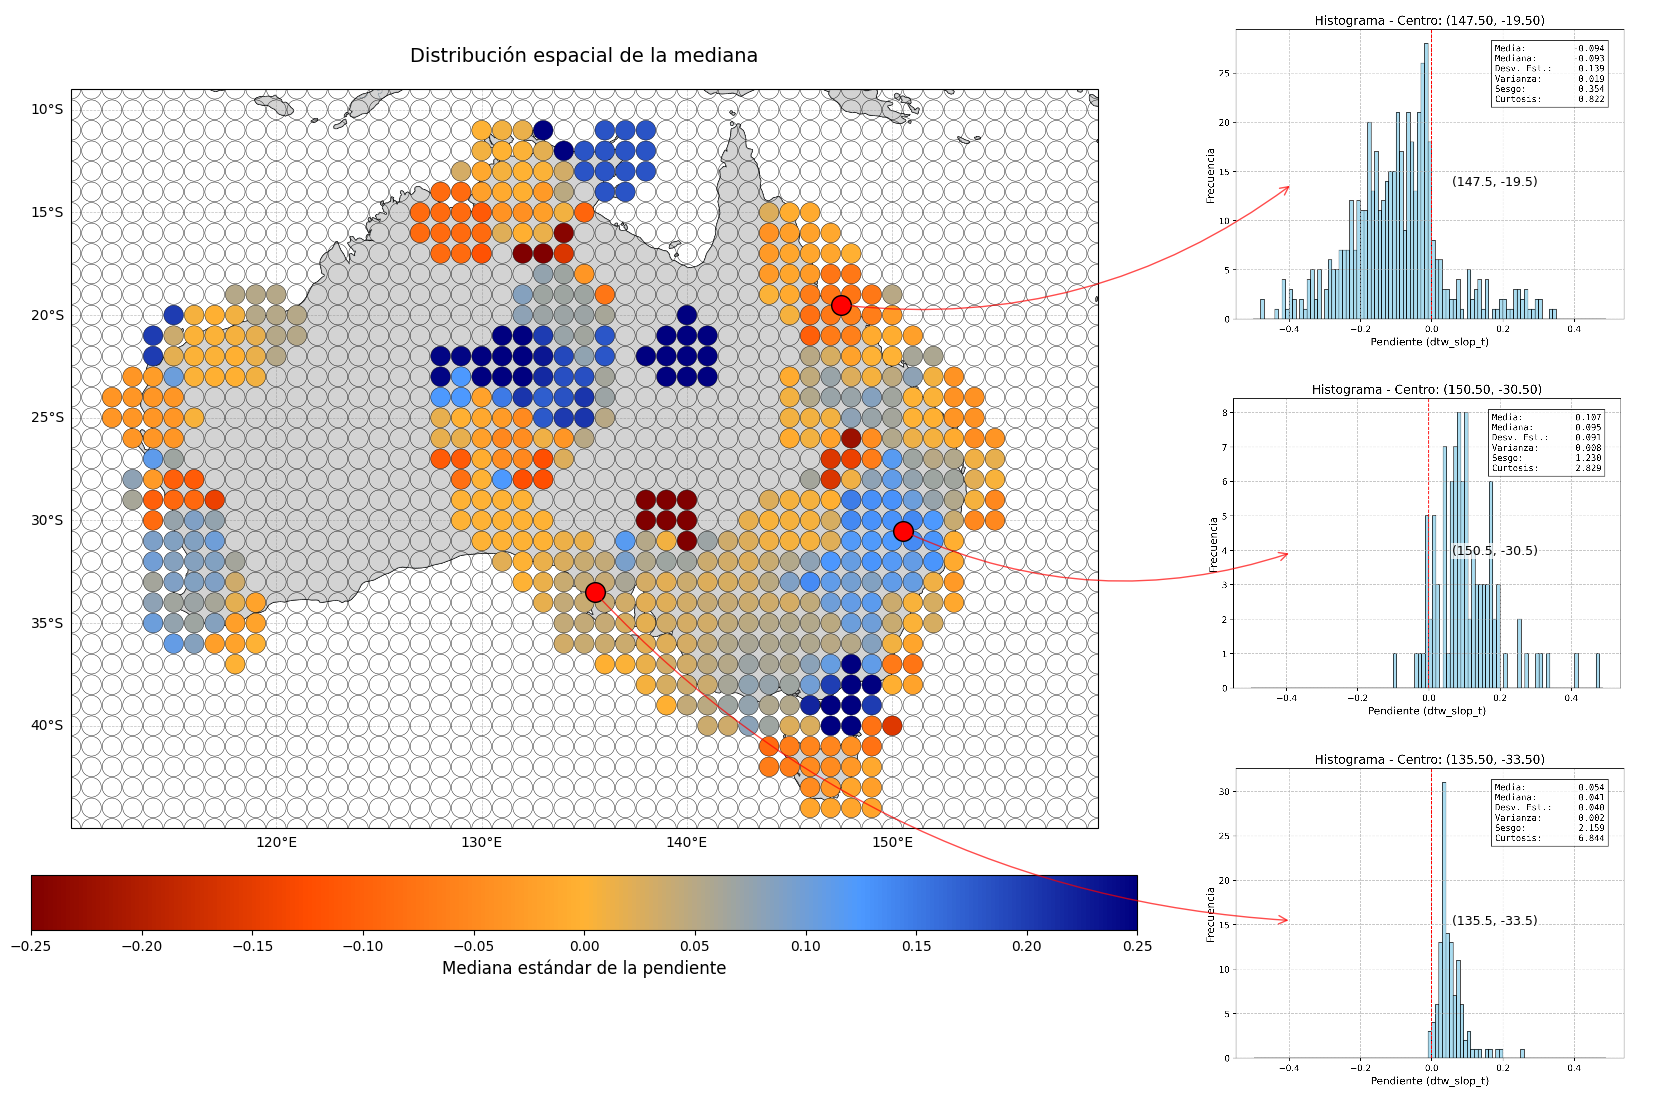

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import ConnectionPatch
from pathlib import Path
from PIL import Image
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# ======================================================================
# CONFIGURACIÓN INICIAL
# ======================================================================
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

# Configuración de rutas
base_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\cartopy'
hist_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\histogramas\grilla\grilla_1°'

# Coordenadas objetivo para los histogramas
target_coords = [
    (147.50, -19.50),
    (150.5, -30.50),
    #(139.50, -34.50),
    (135.50, -33.50)
]

# ======================================================================
# CARGAR DATOS Y CONFIGURAR MAPA BASE
# ======================================================================
# Cargar datos reales
data = np.load(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\theilslopes_DTW.npz')
lat = data['lat']
lon = data['lon']
icond = data['dtw_condyr']
tslope = data['dtw_slop_t']
ipass = np.where(icond == 1)[0]

# Calcular límites del mapa
lon_min, lon_max = max(110, np.min(lon[ipass])-2), min(160, np.max(lon[ipass])+2)
lat_min, lat_max = max(-45, np.min(lat[ipass])-2), min(-9, np.max(lat[ipass])+2)

# Configurar grilla
glon = np.arange(np.floor(lon_min/1)*1, np.ceil(lon_max/1)*1+1, 1)
glat = np.arange(np.floor(lat_min/1)*1, np.ceil(lat_max/1)*1+1, 1)
X, Y = np.meshgrid(glon, glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X)

# Procesamiento de datos
bcnt = np.zeros(ngrid)
mn_slope = np.full(ngrid, np.nan)

for i in range(ngrid):
    bdist = ((X[i] - lon[ipass])**2 + (Y[i] - lat[ipass])**2)
    iloc = np.where(bdist < 4)[0]
    jloc = ipass[iloc]
    bcnt[i] = len(jloc)
    if len(jloc) >= 1:
        mn_slope[i] = np.mean(tslope[jloc])

# Colormap personalizado
colors = [
    (0.5, 0, 0),    # Rojo oscuro
    (1, 0.3, 0),    # Naranja
    (1, 0.7, 0.2),  # Amarillo
    (0.3, 0.6, 1),  # Azul claro
    (0, 0, 0.5)     # Azul oscuro
]
cmap = LinearSegmentedColormap.from_list('custom_div', colors)

# ======================================================================
# CREACIÓN DE LA FIGURA (SOLO UN MAPA)
# ======================================================================
fig = plt.figure(figsize=(24, 12))  # Tamaño ligeramente menor para mejor proporción

# Dividir en 2 partes: 70% mapa, 30% histogramas
gs = fig.add_gridspec(1, 2, width_ratios=[7, 3], wspace=0.05)
ax = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax_hist = fig.add_subplot(gs[1])
ax_hist.axis('off')

# ======================================================================
# CONFIGURACIÓN DE SHAPEFILES
# ======================================================================
def load_shapefile_safe(base_path, folder, filename):
    full_path = Path(base_path) / folder / filename
    if not full_path.exists():
        raise FileNotFoundError(f"Shapefile no encontrado: {full_path}")
    return Reader(full_path)

try:
    land_shp = load_shapefile_safe(base_path, 'ne_50m_land', 'ne_50m_land.shp')
    coast_shp = load_shapefile_safe(base_path, 'ne_50m_coastline', 'ne_50m_coastline.shp')
    border_shp = load_shapefile_safe(base_path, 'ne_50m_admin_0_countries', 'ne_50m_admin_0_countries.shp')
    
    land_feature = ShapelyFeature(land_shp.geometries(), ccrs.PlateCarree(), facecolor='none')
    coast_feature = ShapelyFeature(coast_shp.geometries(), ccrs.PlateCarree(), edgecolor='black', linewidth=0.8)
    border_feature = ShapelyFeature(border_shp.geometries(), ccrs.PlateCarree(), 
                                  facecolor='lightgray', edgecolor='gray', linestyle=':', linewidth=0.5)
except Exception as e:
    print(f"Error cargando shapefiles: {str(e)}")
    land_feature = coast_feature = border_feature = None

# ======================================================================
# CONFIGURACIÓN DEL MAPA DE MEDIANAS
# ======================================================================
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

if land_feature:
    ax.add_feature(land_feature)
    ax.add_feature(coast_feature)
    ax.add_feature(border_feature)

# Configurar grilla
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Scatter plot mediana
sc = ax.scatter(
    X, Y, 
    s=200, 
    c=mn_slope,
    cmap=cmap,
    vmin=-0.25,
    vmax=0.25,
    transform=ccrs.PlateCarree(), 
    edgecolor='k', 
    linewidth=0.3, 
    zorder=10
)

# Barra de color
cbar = plt.colorbar(
    sc, 
    ax=ax, 
    orientation='horizontal', 
    pad=0.05,
    ticks=np.linspace(-0.25, 0.25, 11)
)
cbar.set_label('Mediana estándar de la pendiente', fontsize=12)
ax.set_title('Distribución espacial de la mediana', pad=20, fontsize=14)

# ======================================================================
# AÑADIR HISTOGRAMAS CON FLECHAS (VERSIÓN SIMPLIFICADA)
# ======================================================================
def load_histogram(lon, lat, zoom=0.25):
    lon_str = f"{float(lon):.2f}"
    lat_str = f"{float(lat):.2f}"
    filename = f"Celda_{lon_str}_{lat_str}.png"
    filepath = Path(hist_path) / filename
    
    if filepath.exists():
        img = Image.open(filepath)
        return OffsetImage(img, zoom=zoom)
    return None

# Configuración optimizada para histogramas
n_hist = len(target_coords)
zoom_level = 0.15  # Reducir el tamaño de los histogramas
vertical_spacing = 0.25  # Espacio vertical entre histogramas (ajustar según necesidad)

# Calcular posiciones verticales con más espacio
hist_ys = np.linspace(0.9, 0.1, n_hist)  # Más espacio en los extremos
label_offset = 0.08  # Separación entre histograma y su etiqueta

for i, ((lon, lat), hist_y) in enumerate(zip(target_coords, hist_ys)):
    # Resaltar punto en el mapa (tamaño reducido para mejor visualización)
    ax.scatter(lon, lat, s=200, color='red', edgecolor='black', 
              zorder=20, transform=ccrs.PlateCarree())
    
    # Cargar histograma con zoom reducido
    img_box = load_histogram(lon, lat, zoom=zoom_level)
    if img_box:
        # Ajustar posición horizontal para mejor distribución
        hist_x_pos = 0.5  # Posición base (0.5 = centro del área de histogramas)
        
        # Posición del histograma
        ab = AnnotationBbox(img_box, (hist_x_pos, hist_y), 
                          xycoords='axes fraction',
                          boxcoords='axes fraction',
                          box_alignment=(0.5, 0.5),  # Centrado
                          frameon=False,
                          pad=0)
        ax_hist.add_artist(ab)
        
        # Añadir etiqueta con coordenadas (posición relativa al histograma)
        ax_hist.text(hist_x_pos + label_offset, hist_y, 
                    f'({lon:.1f}, {lat:.1f})',  # Un decimal para ahorrar espacio
                    transform=ax_hist.transAxes,
                    va='center', ha='left', 
                    fontsize=9,  # Tamaño de fuente reducido
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
        
        # Flecha más delgada y con mejor curvatura
        con = ConnectionPatch(
            xyA=(lon, lat), coordsA=ax.transData,
            xyB=(hist_x_pos - 0.25, hist_y), coordsB=ax_hist.transAxes,
            arrowstyle="->", 
            shrinkA=5, 
            shrinkB=5,
            mutation_scale=15,  # Flecha más pequeña
            color="red", 
            linewidth=1.0,  # Más delgada
            linestyle="-", 
            alpha=0.7,
            transform=fig.transFigure,
            connectionstyle="arc3,rad=0.2"  # Curva suave
        )
        fig.patches.append(con)

# Ajustes finales de layout
plt.tight_layout()
plt.subplots_adjust(
    right=0.8,  # Más espacio para los histogramas
    wspace=0.15  # Espacio entre mapa y área de histogramas
)

# Guardar la figura
output_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\mapas\mapa_mediana_histogramas.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_12264\581912288.py:204: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


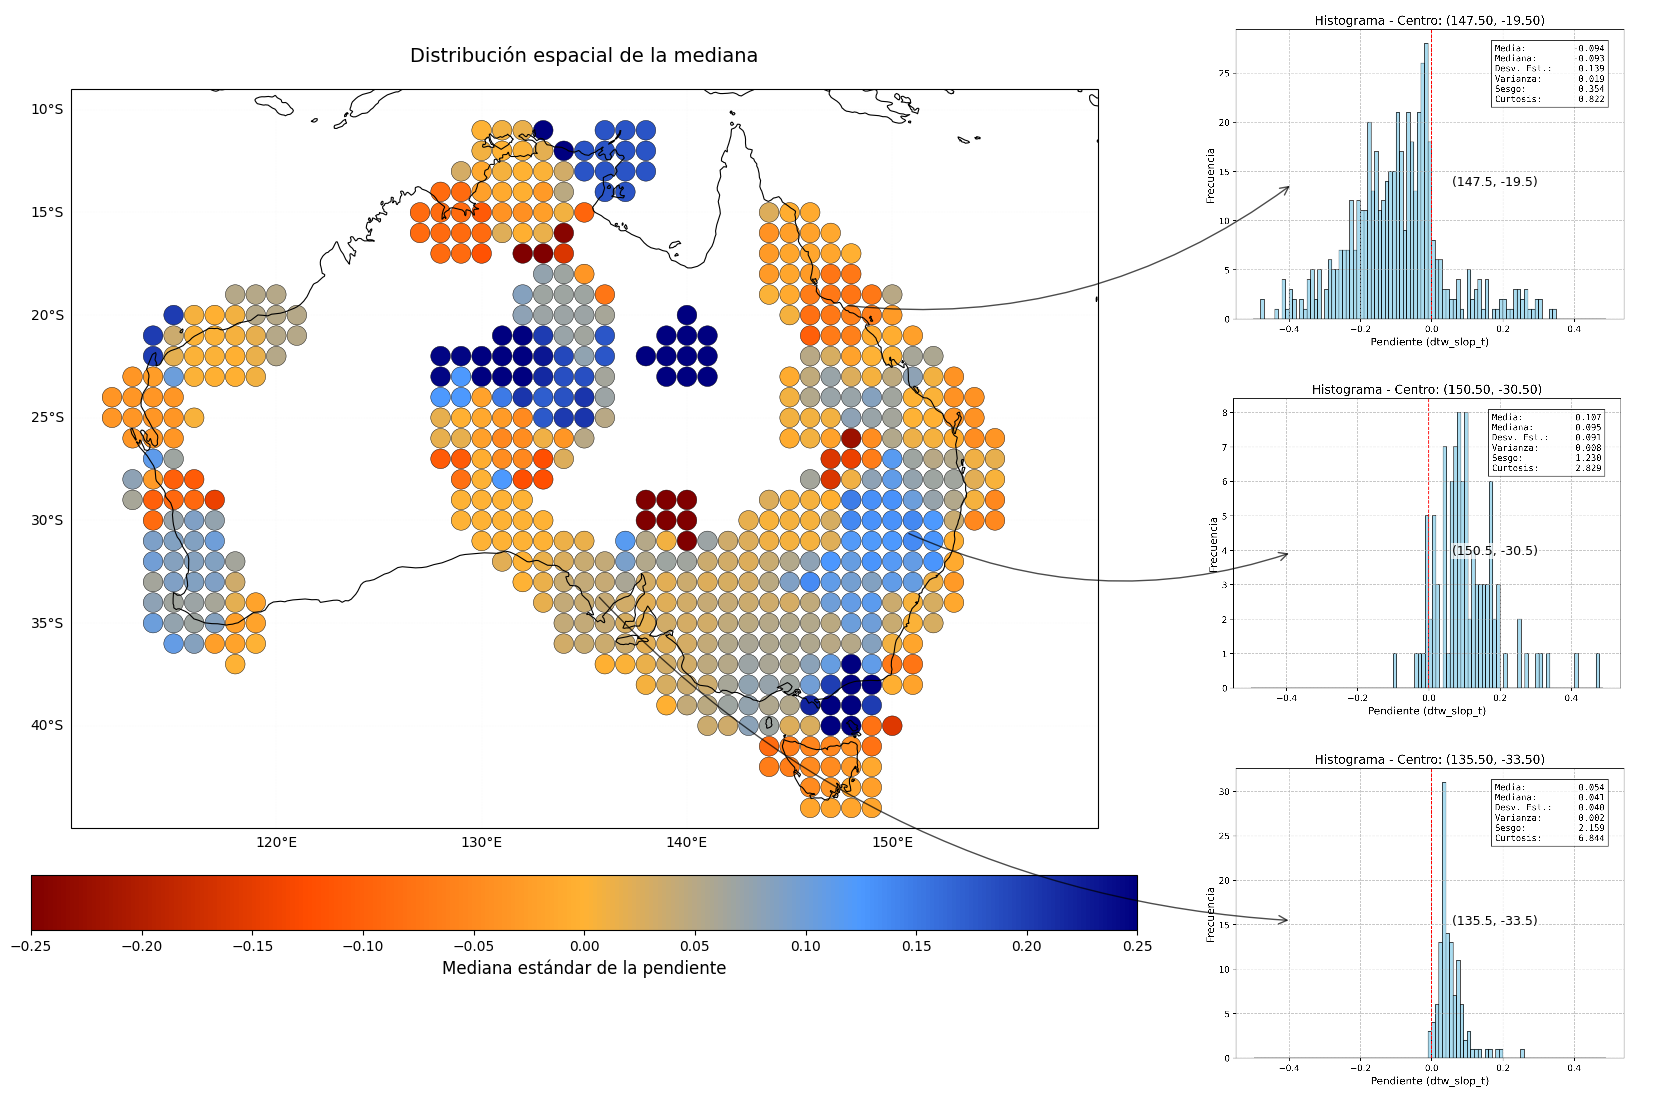

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import ConnectionPatch
from pathlib import Path
from PIL import Image
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# ======================================================================
# CONFIGURACIÓN INICIAL
# ======================================================================
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

# Configuración de rutas
base_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\cartopy'
hist_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\histogramas\grilla\grilla_1°'

# Coordenadas objetivo para los histogramas
target_coords = [
    (147.50, -19.50),
    (150.5, -30.50),
    (135.50, -33.50)
]

# ======================================================================
# CARGAR DATOS Y CONFIGURAR MAPA BASE
# ======================================================================
# Cargar datos reales
data = np.load(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\theilslopes_DTW.npz')
lat = data['lat']
lon = data['lon']
icond = data['dtw_condyr']
tslope = data['dtw_slop_t']
ipass = np.where(icond == 1)[0]

# Calcular límites del mapa
lon_min, lon_max = max(110, np.min(lon[ipass])-2), min(160, np.max(lon[ipass])+2)
lat_min, lat_max = max(-45, np.min(lat[ipass])-2), min(-9, np.max(lat[ipass])+2)

# Configurar grilla
glon = np.arange(np.floor(lon_min/1)*1, np.ceil(lon_max/1)*1+1, 1)
glat = np.arange(np.floor(lat_min/1)*1, np.ceil(lat_max/1)*1+1, 1)
X, Y = np.meshgrid(glon, glat)
X = X.flatten()
Y = Y.flatten()
ngrid = len(X)

# Procesamiento de datos
bcnt = np.zeros(ngrid)
mn_slope = np.full(ngrid, np.nan)

for i in range(ngrid):
    bdist = ((X[i] - lon[ipass])**2 + (Y[i] - lat[ipass])**2)
    iloc = np.where(bdist < 4)[0]
    jloc = ipass[iloc]
    bcnt[i] = len(jloc)
    if len(jloc) >= 1:
        mn_slope[i] = np.mean(tslope[jloc])

# Colormap personalizado
colors = [
    (0.5, 0, 0),    # Rojo oscuro
    (1, 0.3, 0),    # Naranja
    (1, 0.7, 0.2),  # Amarillo
    (0.3, 0.6, 1),  # Azul claro
    (0, 0, 0.5)     # Azul oscuro
]
cmap = LinearSegmentedColormap.from_list('custom_div', colors)

# ======================================================================
# CREACIÓN DE LA FIGURA (SOLO UN MAPA)
# ======================================================================
fig = plt.figure(figsize=(24, 12))

# Dividir en 2 partes: 70% mapa, 30% histogramas
gs = fig.add_gridspec(1, 2, width_ratios=[7, 3], wspace=0.05)
ax = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax_hist = fig.add_subplot(gs[1])
ax_hist.axis('off')

# ======================================================================
# CONFIGURACIÓN DE SHAPEFILES (SOLO LÍNEA DE COSTA)
# ======================================================================
def load_shapefile_safe(base_path, folder, filename):
    full_path = Path(base_path) / folder / filename
    if not full_path.exists():
        raise FileNotFoundError(f"Shapefile no encontrado: {full_path}")
    return Reader(full_path)

try:
    coast_shp = load_shapefile_safe(base_path, 'ne_50m_coastline', 'ne_50m_coastline.shp')
    coast_feature = ShapelyFeature(coast_shp.geometries(), ccrs.PlateCarree(), 
                                 edgecolor='black', facecolor='none', linewidth=0.8)
except Exception as e:
    print(f"Error cargando shapefile de costa: {str(e)}")
    coast_feature = None

# ======================================================================
# CONFIGURACIÓN DEL MAPA DE MEDIANAS (ESTILO MINIMALISTA)
# ======================================================================
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.set_facecolor('white')

if coast_feature:
    ax.add_feature(coast_feature, zorder=10)

# Configurar grilla muy tenue
gl = ax.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.2, linestyle=':')
gl.top_labels = False
gl.right_labels = False

# Scatter plot mediana con filtro de puntos válidos
valid_points = ~np.isnan(mn_slope)
sc = ax.scatter(
    X[valid_points], Y[valid_points], 
    s=200, 
    c=mn_slope[valid_points],
    cmap=cmap,
    vmin=-0.25,
    vmax=0.25,
    transform=ccrs.PlateCarree(), 
    edgecolor='k', 
    linewidth=0.3, 
    zorder=5
)

# Barra de color
cbar = plt.colorbar(
    sc, 
    ax=ax, 
    orientation='horizontal', 
    pad=0.05,
    ticks=np.linspace(-0.25, 0.25, 11)
)
cbar.set_label('Mediana estándar de la pendiente', fontsize=12)
ax.set_title('Distribución espacial de la mediana', pad=20, fontsize=14)

# ======================================================================
# AÑADIR HISTOGRAMAS CON FLECHAS NEGRAS (SIN PUNTO ROJO)
# ======================================================================
def load_histogram(lon, lat, zoom=0.25):
    lon_str = f"{float(lon):.2f}"
    lat_str = f"{float(lat):.2f}"
    filename = f"Celda_{lon_str}_{lat_str}.png"
    filepath = Path(hist_path) / filename
    
    if filepath.exists():
        img = Image.open(filepath)
        return OffsetImage(img, zoom=zoom)
    return None

# Configuración optimizada para histogramas
n_hist = len(target_coords)
zoom_level = 0.15
vertical_spacing = 0.25
hist_ys = np.linspace(0.9, 0.1, n_hist)
label_offset = 0.08

for i, ((lon, lat), hist_y) in enumerate(zip(target_coords, hist_ys)):
    # Cargar histograma con zoom reducido
    img_box = load_histogram(lon, lat, zoom=zoom_level)
    if img_box:
        hist_x_pos = 0.5
        
        # Posición del histograma
        ab = AnnotationBbox(img_box, (hist_x_pos, hist_y), 
                          xycoords='axes fraction',
                          boxcoords='axes fraction',
                          box_alignment=(0.5, 0.5),
                          frameon=False,
                          pad=0)
        ax_hist.add_artist(ab)
        
        # Añadir etiqueta con coordenadas
        ax_hist.text(hist_x_pos + label_offset, hist_y, 
                    f'({lon:.1f}, {lat:.1f})',
                    transform=ax_hist.transAxes,
                    va='center', ha='left', 
                    fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))
        
        # Flecha negra (modificada según solicitud)
        con = ConnectionPatch(
            xyA=(lon, lat), coordsA=ax.transData,
            xyB=(hist_x_pos - 0.25, hist_y), coordsB=ax_hist.transAxes,
            arrowstyle="->", 
            shrinkA=5, 
            shrinkB=5,
            mutation_scale=15,
            color="black",  # Flecha negra en lugar de roja
            linewidth=1.0,
            linestyle="-", 
            alpha=0.7,
            transform=fig.transFigure,
            connectionstyle="arc3,rad=0.2"
        )
        fig.patches.append(con)

# Ajustes finales de layout
plt.tight_layout()
plt.subplots_adjust(
    right=0.8,
    wspace=0.15
)

# Guardar la figura
output_path = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\mapas\mapa_mediana_histogramas_ko.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()